In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating the dataframe of train data by importing train_crab.csv file
Train_df=pd.read_csv('/content/drive/MyDrive/Second_competition/train.csv/train.csv',index_col='id')
Train_df.sample(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
7027,F,1.3750,1.1625,0.3125,22.651250,9.199413,5.669900,6.520385,13
38516,M,1.7500,1.4125,0.4500,49.639975,19.617854,9.511257,16.159215,18
27268,I,0.7125,0.5000,0.1625,2.083688,0.907184,0.609514,0.850485,5


In [ ]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [ ]:
Train_df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

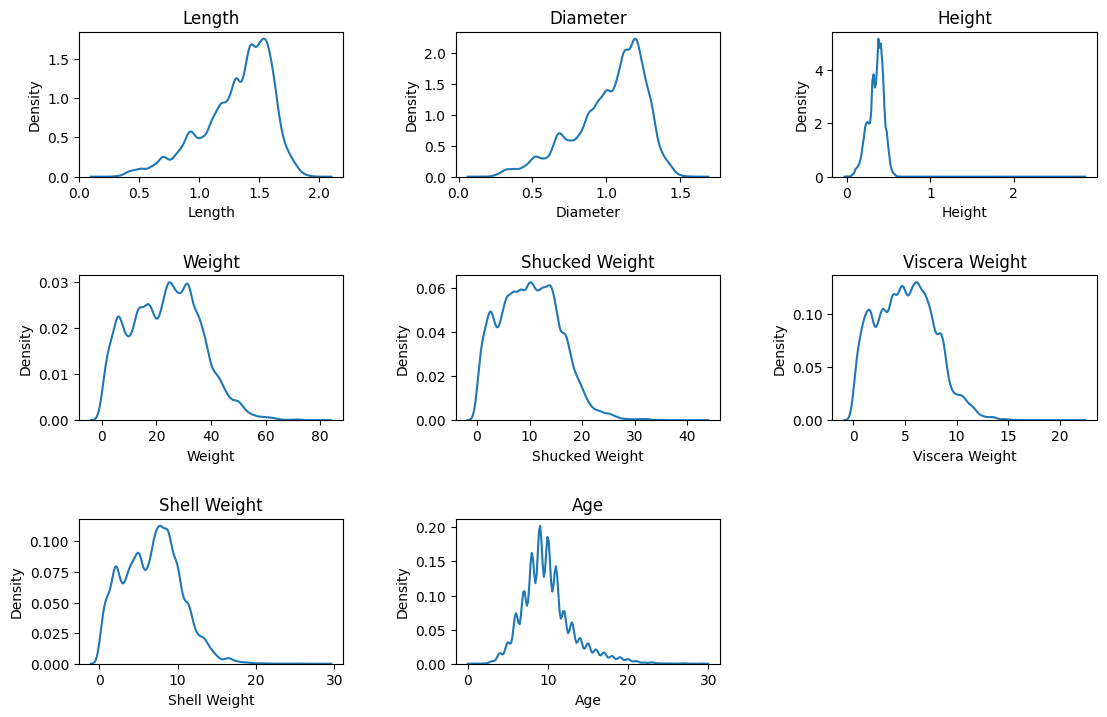

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12, 8))
fig.tight_layout(pad=5)  # Adjust padding between subplots

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns and create subplots
for i, col in enumerate(Train_df.iloc[:,1:].columns):
    sns.kdeplot(data=Train_df,x=col,ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots if the number of columns is less than 9
if len(Train_df.iloc[:,1:].columns) < 3*3:
    for j in range(len(Train_df.iloc[:,1:].columns),3*3):
        fig.delaxes(axes[j])

plt.show()

In [ ]:
Train_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
Train_df.isin({0}).sum()

Sex                0
Length             0
Diameter           0
Height            24
Weight             0
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

In [ ]:
original_df=pd.read_csv('/content/drive/MyDrive/Second_competition/CrabAgePrediction.csv')
original_df.sample(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
417,F,1.2000,1.0000,0.3125,21.517270,6.024269,5.074560,6.803880,15
3339,F,1.4125,1.1250,0.3625,24.082900,11.949314,4.776891,6.378637,8
2864,I,0.6125,0.4875,0.1500,2.693202,1.261553,0.694563,0.737087,4


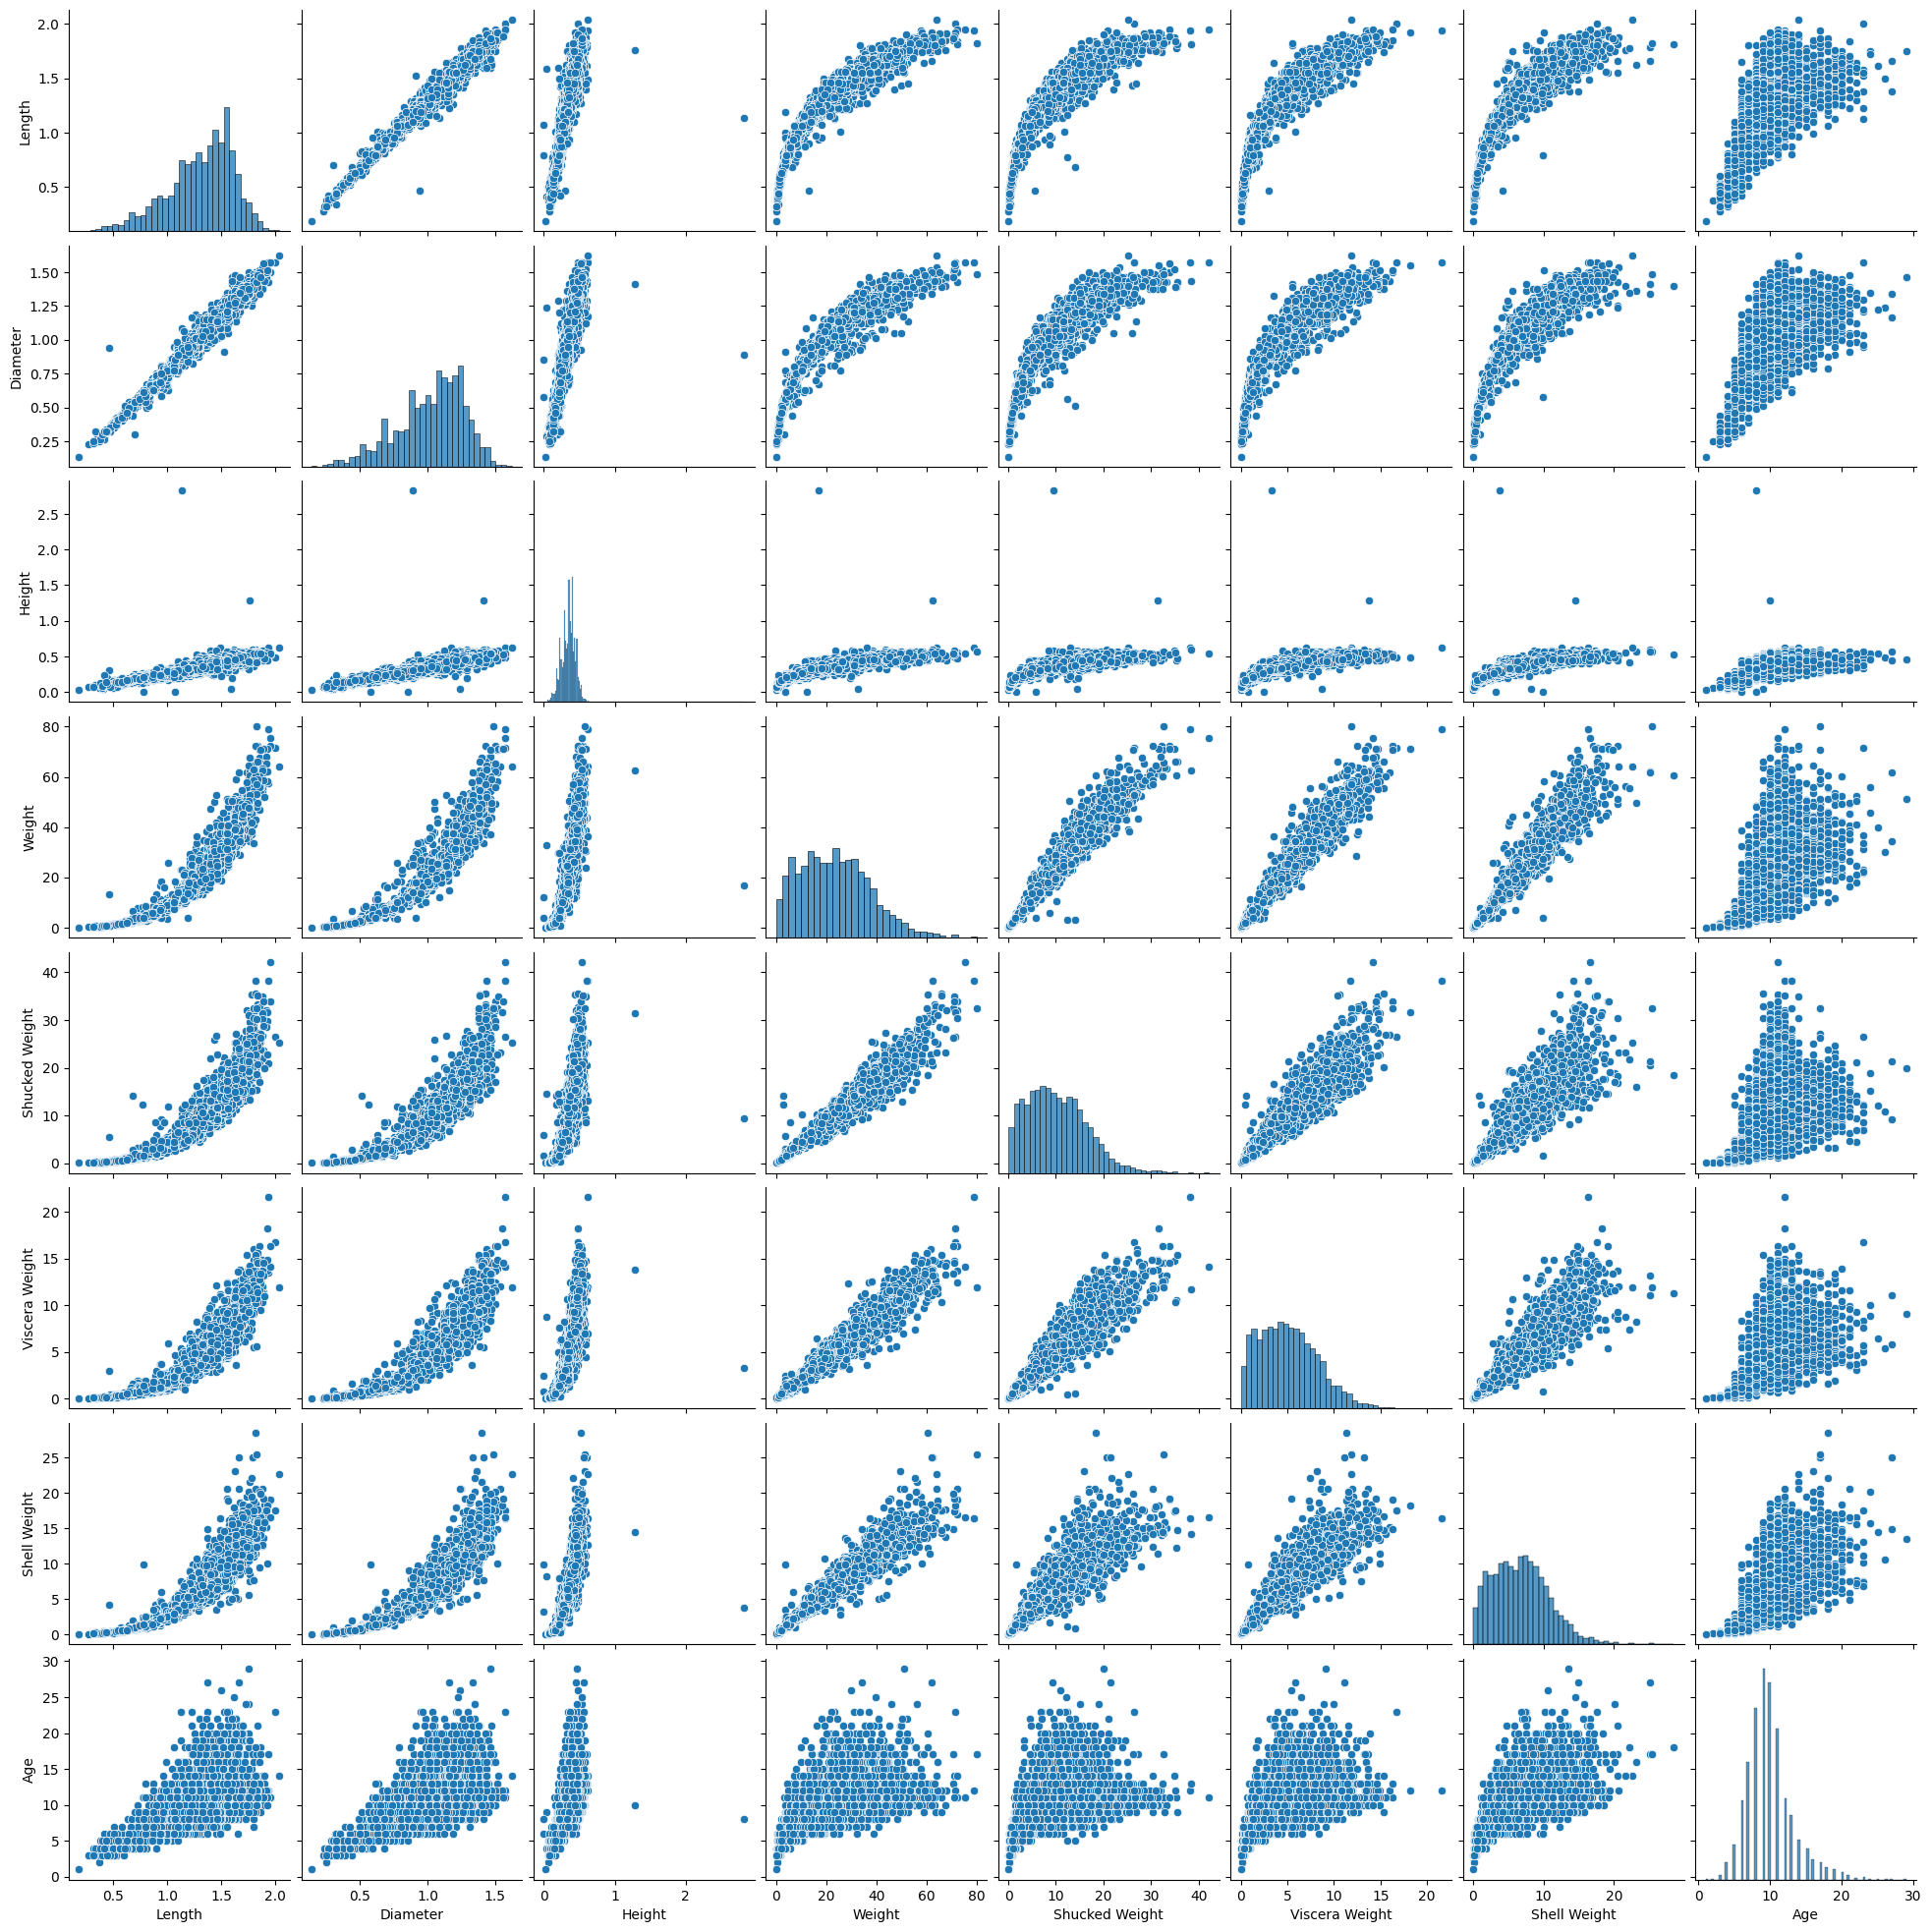

In [ ]:
sns.pairplot(original_df)

In [ ]:
original_df['Sex'].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

<Axes: xlabel='Shell Weight', ylabel='Count'>

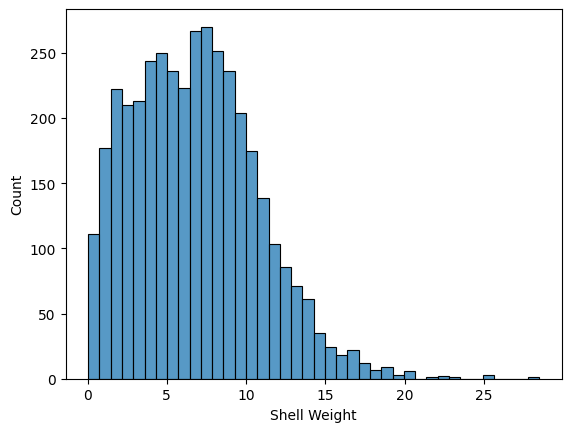

In [ ]:
sns.histplot(original_df['Shell Weight'])

In [ ]:
original_df[['Shucked Weight','Age']].groupby('Age').median().head()

,Shucked Weight
Age,
1,0.028349
2,0.127573
3,0.354369
4,0.595340
5,1.204854


In [ ]:
# Creating the dataframe of test data by importing test_crab.csv file
valid_df=pd.read_csv('/content/drive/MyDrive/Second_competition/test.csv/test.csv',index_col='id')
valid_df.head() 

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [ ]:
valid_df.isin({0}).sum()

Sex                0
Length             0
Diameter           0
Height            14
Weight             0
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
dtype: int64

In [ ]:
Total_df=pd.concat([Train_df,valid_df,original_df],axis=0,ignore_index=True)

In [ ]:
Total_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...
127307,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8.0
127308,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10.0
127309,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5.0
127310,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6.0


In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10)
Total_df['Height']=Total_df['Height'].replace(0,np.nan)
Total_df['Height'].values.reshape(-1,1)
Total_df['Height'] = imputer.fit_transform(Total_df['Height'].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Total_df['Sex']=lb.fit_transform(Total_df['Sex'])
Total_df.head(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9.0
1,1,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8.0
2,2,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9.0


In [ ]:
# Calculate the volume
import math
Total_df["Volume"] = math.pi * (Total_df["Diameter"] * Total_df["Length"] *Total_df["Height"] )/3

Total_df['Area']=math.pi * (Total_df["Diameter"] * Total_df["Length"])/4

Total_df['Remianing_weight']=Total_df['Weight']-(Total_df['Shucked Weight']+Total_df['Viscera Weight']+Total_df['Shell Weight'])

Total_df['LogL']=np.log(Total_df['Length'])

Total_df['D_2']=Total_df['Diameter']**2

Total_df['exp_h']=np.exp(Total_df['Height'])

Total_df['Dia_len']=Total_df['Diameter']/Total_df['Length']

Total_df['Hgt_len']=Total_df['Height']/Total_df['Length']

Total_df["Shucked_to_Weight"] = Total_df["Shucked Weight"] / Total_df["Weight"]

Total_df["Viscera_to_Weight"] = Total_df["Viscera Weight"] / Total_df["Weight"]

Total_df['Shell_to_Weight'] = Total_df['Shell Weight'] / Total_df['Weight']

Total_df['rm_weight']=Total_df['Remianing_weight']/Total_df['Weight']


In [ ]:
'''from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x=df['Length'].values
y=df['Weight'].values
x=x.reshape(-1,1)

# Transform the feature into polynomial features
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(x)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate points for the best curve
x_curve = np.linspace(min(x), max(x), 74027).reshape(-1, 1)
x_curve_poly = poly_features.transform(x_curve)
y_curve = model.predict(x_curve_poly)

# Plot the data and best curve
plt.scatter(x, y)
plt.plot(x_curve, y_curve, color='red', label='Best Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()'''

"from sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\nx=df['Length'].values\ny=df['Weight'].values\nx=x.reshape(-1,1)\n\n# Transform the feature into polynomial features\npoly_features = PolynomialFeatures(degree=4)\nX_poly = poly_features.fit_transform(x)\n\n# Fit the polynomial regression model\nmodel = LinearRegression()\nmodel.fit(X_poly, y)\n\n# Generate points for the best curve\nx_curve = np.linspace(min(x), max(x), 74027).reshape(-1, 1)\nx_curve_poly = poly_features.transform(x_curve)\ny_curve = model.predict(x_curve_poly)\n\n# Plot the data and best curve\nplt.scatter(x, y)\nplt.plot(x_curve, y_curve, color='red', label='Best Curve')\nplt.xlabel('X')\nplt.ylabel('Y')\nplt.title('Polynomial Regression')\nplt.legend()\nplt.show()"

In [ ]:
Total_df.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Volume,...,Remianing_weight,LogL,D_2,exp_h,Dia_len,Hgt_len,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,rm_weight
count,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,77944.000000,127312.000000,...,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000,127312.000000
mean,1.052823,1.318177,1.025108,0.348472,23.421577,10.117484,5.066294,6.734604,9.967156,0.566752,...,1.503195,0.246264,1.107216,1.423176,0.775016,0.262618,0.431418,0.216974,0.293007,0.058601
std,0.820957,0.287843,0.237425,0.092337,12.685451,5.636833,2.802325,3.592514,3.177472,0.315794,...,1.728441,0.261911,0.446587,0.159904,0.031221,0.031508,0.079342,0.030774,0.041260,0.091984
min,0.000000,0.187500,0.137500,0.012500,0.056699,0.028349,0.014175,0.042524,1.000000,0.000675,...,-38.172602,-1.673976,0.018906,1.012578,0.268293,0.023256,0.083333,0.042254,0.046948,-7.760807
25%,0.000000,1.150000,0.887500,0.300000,13.466012,5.712424,2.863300,3.968930,8.000000,0.318086,...,0.382718,0.139762,0.787656,1.349859,0.758621,0.245455,0.398188,0.198985,0.267606,0.028846
50%,1.000000,1.375000,1.075000,0.362500,23.785231,9.908150,4.975337,6.931453,10.000000,0.570125,...,1.148155,0.318454,1.155625,1.436917,0.776596,0.261538,0.432075,0.215809,0.289015,0.058488
75%,2.000000,1.537500,1.200000,0.412500,32.205032,14.047177,7.002326,9.103733,11.000000,0.792191,...,2.267960,0.430158,1.440000,1.510590,0.792308,0.278689,0.463444,0.233669,0.314433,0.093458
max,2.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,3.505072,...,25.500375,0.711724,2.640625,16.860945,2.054054,2.483516,5.537313,2.146974,2.615672,0.816901


In [ ]:
Total_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Volume,...,Remianing_weight,LogL,D_2,exp_h,Dia_len,Hgt_len,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,rm_weight
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0,0.703668,...,1.247378,0.421994,1.380625,1.454991,0.770492,0.245902,0.439335,0.229452,0.288160,0.043053
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0,0.261341,...,0.170097,0.095310,0.680625,1.316531,0.750000,0.250000,0.434014,0.223129,0.326531,0.016327
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0,0.606168,...,1.219029,0.327504,1.237656,1.454991,0.801802,0.270270,0.457666,0.224256,0.268879,0.049199
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0,1.257292,...,4.316891,0.530628,1.995156,1.648721,0.830882,0.294118,0.401791,0.216970,0.296027,0.085212
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0,0.447309,...,0.850485,0.223144,1.025156,1.401440,0.810000,0.270000,0.514303,0.193548,0.255630,0.036519


In [ ]:
sns.pairplot(Total_df)

In [ ]:
Total_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Volume', 'Area',
       'Remianing_weight', 'LogL', 'D_2', 'exp_h', 'Dia_len', 'Hgt_len',
       'Shucked_to_Weight', 'Viscera_to_Weight', 'Shell_to_Weight',
       'rm_weight'],
      dtype='object')

In [ ]:
re_ordered_cols=['Sex', 'Length', 'Diameter', 'Height','Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Volume', 'Area','Weight',
       'Remianing_weight','LogL','D_2','exp_h','Dia_len','Hgt_len',
       'Shucked_to_Weight','Viscera_to_Weight','Shell_to_Weight',
       'rm_weight','Age']
Total_df=Total_df.reindex(columns=re_ordered_cols)

<Axes: >

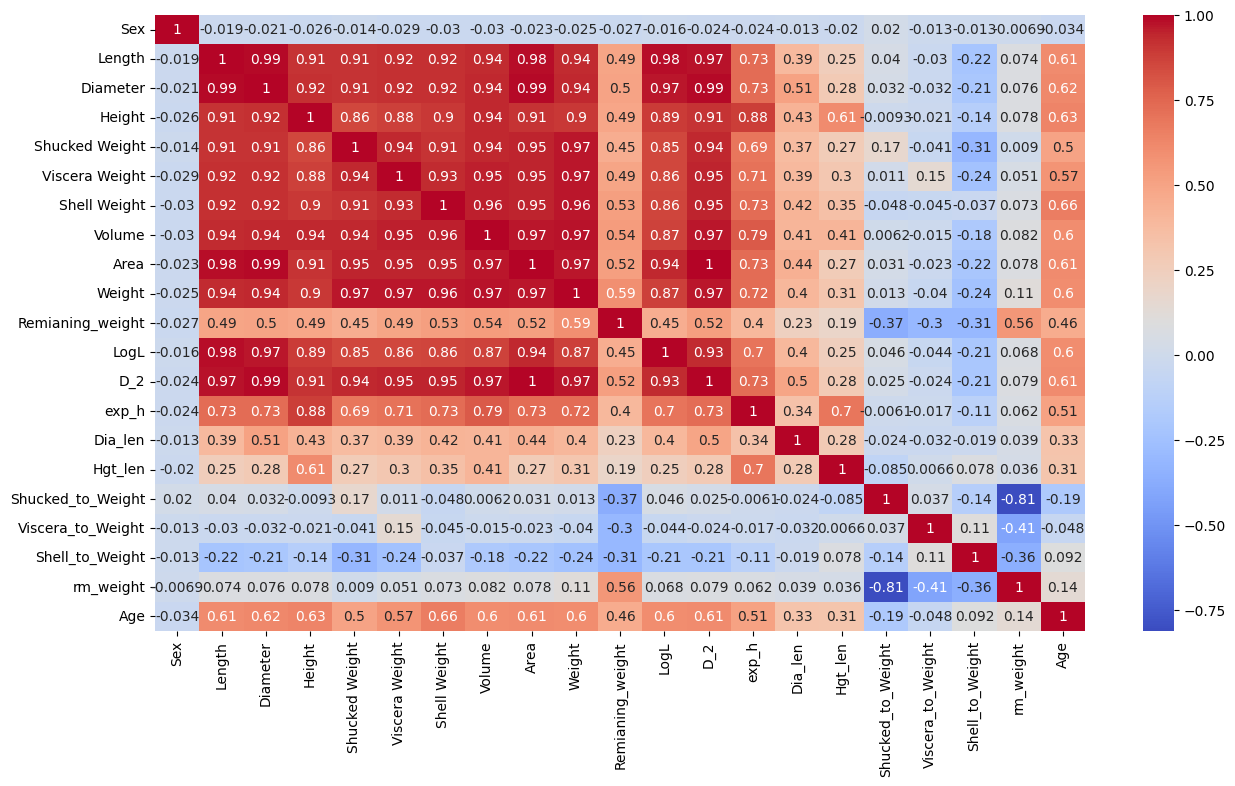

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(Total_df.corr(),annot=True,cmap='coolwarm')

In [ ]:
Total_fdf=Total_df.iloc[:,:]

In [ ]:
Total_fdf

,Sex,Length,Diameter,Height,Shucked Weight,Viscera Weight,Shell Weight,Volume,Area,Weight,...,LogL,D_2,exp_h,Dia_len,Hgt_len,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,rm_weight,Age
0,1,1.5250,1.1750,0.3750,12.728926,6.647958,8.348928,0.703668,1.407335,28.973189,...,0.421994,1.380625,1.454991,0.770492,0.245902,0.439335,0.229452,0.288160,0.043053,9.0
1,1,1.1000,0.8250,0.2750,4.521745,2.324659,3.401940,0.261341,0.712749,10.418441,...,0.095310,0.680625,1.316531,0.750000,0.250000,0.434014,0.223129,0.326531,0.016327,8.0
2,2,1.3875,1.1125,0.3750,11.339800,5.556502,6.662133,0.606168,1.212336,24.777463,...,0.327504,1.237656,1.454991,0.801802,0.270270,0.457666,0.224256,0.268879,0.049199,9.0
3,0,1.7000,1.4125,0.5000,20.354941,10.991839,14.996885,1.257292,1.885937,50.660556,...,0.530628,1.995156,1.648721,0.830882,0.294118,0.401791,0.216970,0.296027,0.085212,11.0
4,1,1.2500,1.0125,0.3375,11.977664,4.507570,5.953395,0.447309,0.994020,23.289114,...,0.223144,1.025156,1.401440,0.810000,0.270000,0.514303,0.193548,0.255630,0.036519,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127307,0,1.4625,1.1375,0.3250,11.651644,5.854172,6.378637,0.566186,1.306583,24.819987,...,0.380147,1.293906,1.384031,0.777778,0.222222,0.469446,0.235865,0.256996,0.037693,8.0
127308,0,1.5500,1.2125,0.4375,15.450477,7.172423,9.780577,0.861034,1.476058,34.458817,...,0.438255,1.470156,1.548830,0.782258,0.282258,0.448375,0.208145,0.283834,0.059646,10.0
127309,1,0.6250,0.4625,0.1625,0.765436,0.524466,0.637864,0.049190,0.227029,2.012815,...,-0.470004,0.213906,1.176448,0.740000,0.260000,0.380282,0.260563,0.316901,0.042254,5.0
127310,1,1.0625,0.7750,0.2625,4.507570,2.338834,2.976698,0.226354,0.646726,10.347568,...,0.060625,0.600625,1.300176,0.729412,0.247059,0.435616,0.226027,0.287671,0.050685,6.0


In [ ]:
X_valid=Total_fdf[Total_fdf['Age'].isnull()]
X_valid.drop('Age',inplace=True,axis=1)

In [ ]:
T_df=Total_fdf[Total_fdf['Age'].isnull()==False]

In [ ]:
T_df.shape

(77944, 21)

In [ ]:
X=T_df.drop('Age',axis=1)
Y=T_df['Age']

In [ ]:
print(X.shape)

(77944, 20)


In [ ]:
print(Y.shape)

(77944,)


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.4 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
'''from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = param_grid = { 'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [10, 20, 30],
    'min_child_samples': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1,0.5],
    'min_gain_to_split': [0.1,0.5],
    'extra_trees': [False, True],
    'max_depth': [None, 3, 5],
    'min_child_weight': [0.001, 0.01, 0.1],
    'bagging_fraction': [0.8, 0.9],
    'bagging_freq': [1, 2, 3],
    'feature_fraction': [0.8, 0.9],
    'path_smooth': [0.0, 0.1, 0.5],
}

# Create the XGBoost regressor estimate
lgbm_reg=LGBMRegressor()

# Performing grid search
grid_search = GridSearchCV(lgbm_reg,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mae = mean_absolute_error(Y_test,best_model.predict(X_test))
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)'''

In [ ]:
#pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import VotingRegressor

reg = LazyRegressor(ignore_warnings=True, custom_metric=mean_absolute_error, random_state=0)

models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

top_models = models.sort_values('mean_absolute_error')[:5]

estimators = [(name, model) for name, model in zip(top_models.index, top_models['ML Model'])]

ensemble = VotingRegressor(estimators=estimators)
ensemble.fit(X_train, Y_train)
ensemble_predictions = ensemble.predict(X_test)
ensemble_score = ensemble.score(X_test, Y_test)
print(ensemble_score)'''

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

# Define your feature matrix X and target vector y

# Define LGBM regressor with regularization parameters
lgbm_model = lgb.LGBMRegressor(n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    feature_fraction=0.8,
    bagging_fraction=0.6
)

# Fit the model
lgbm_model.fit(X_train,Y_train, eval_set=[(X_test,Y_test)], early_stopping_rounds=10)

# Make predictions
y_pred = lgbm_model.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print(mae)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_tdf_sc=sc.fit_transform(X)

In [ ]:
X_train_sc,X_test_sc,Y_train,Y_test=train_test_split(X_tdf_sc,Y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_df=pca.fit_transform(X_tdf_sc)

explained_variance_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Eigenvalues:", eigenvalues)

Explained Variance Ratio: [0.58285483 0.1120502  0.07230975 0.05294237 0.04963983]
Eigenvalues: [11.65724617  2.24103281  1.4462135   1.058861    0.9928094 ]


In [ ]:
finalx_df=pd.DataFrame(x_df,columns=['X1','X2','X3','X4','X5']) 
finalx_df

,X1,X2,X3,X4,X5
0,1.623802,0.535618,-0.576201,-0.715742,-0.117507
1,-3.255241,0.482671,0.315542,-0.276162,0.006511
2,0.852178,0.392130,-0.165998,0.601348,-1.038958
3,6.637407,-0.410639,0.784041,-0.549105,1.100033
4,-0.253922,0.471521,-0.618656,1.372245,0.503093
...,...,...,...,...,...
77939,0.563809,0.692099,-1.499529,-1.130491,1.084684
77940,2.996586,0.145685,0.151338,0.051653,1.324880
77941,-6.877727,-0.133792,0.979911,-0.822833,-0.174545
77942,-3.601491,0.012619,-0.382526,-0.173217,0.065653


In [ ]:
pca_df=pd.concat([finalx_df,T_df['Age']],axis=1)

In [ ]:
pca_df['Age'].isna().sum()

3893

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = param_grid = {
    'learning_rate': [0.5,0.25, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [20,50,100],
    'feature_fraction':[0.8,0.7],
    'bagging_fraction':[0.7,0.5]
}
# Create the XGBoost regressor estimate
lgbm_reg=LGBMRegressor()

# Performing grid search
grid_search = GridSearchCV(lgbm_reg,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mae = mean_absolute_error(Y_test,best_model.predict(X_test))
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
Best Parameters: {'bagging_fraction': 0.7, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'num_leaves': 50}
Mean Absolute Error: 1.3995442167855416
RMSE: 2.0293900786943033
R2 Score: 0.5871046021834794


In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Second_competition/sample_submission.csv',index_col='id')
sample_submission

,Age
id,
74051,10
74052,10
74053,10
74054,10
74055,10
...,...
123414,10
123415,10
123416,10


In [ ]:
y_predict=lgbm_model.predict(X_valid)

In [ ]:
sample_submission['Age']=y_predict

In [ ]:
sample_submission.to_csv('submission(8)_lgbm.csv')